# Optimisation of a state-to-state transfer in a lambda system with RWA

In [1]:
# NBVAL_IGNORE_OUTPUT
%load_ext watermark
#import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import krotov
from qutip import *
%watermark -v --iversions

numpy       1.13.1
scipy       0.19.1
matplotlib  3.0.2
matplotlib.pylab  1.13.1
krotov      0.0.1
qutip       4.3.1
qutip.qobj  4.3.1
qutip.solver  4.3.1
CPython 3.6.2
IPython 7.1.1


$\newcommand{tr}[0]{\operatorname{tr}}
\newcommand{diag}[0]{\operatorname{diag}}
\newcommand{abs}[0]{\operatorname{abs}}
\newcommand{pop}[0]{\operatorname{pop}}
\newcommand{aux}[0]{\text{aux}}
\newcommand{opt}[0]{\text{opt}}
\newcommand{tgt}[0]{\text{tgt}}
\newcommand{init}[0]{\text{init}}
\newcommand{lab}[0]{\text{lab}}
\newcommand{rwa}[0]{\text{rwa}}
\newcommand{bra}[1]{\langle#1\vert}
\newcommand{ket}[1]{\vert#1\rangle}
\newcommand{Bra}[1]{\left\langle#1\right\vert}
\newcommand{Ket}[1]{\left\vert#1\right\rangle}
\newcommand{Braket}[2]{\left\langle #1\vphantom{#2} \mid #2\vphantom{#1}\right\rangle}
\newcommand{Ketbra}[2]{\left\vert#1\vphantom{#2} \right\rangle \hspace{-0.2em} \left\langle #2\vphantom{#1} \right\vert}
\newcommand{op}[1]{\hat{#1}}
\newcommand{Op}[1]{\hat{#1}}
\newcommand{dd}[0]{\,\text{d}}
\newcommand{Liouville}[0]{\mathcal{L}}
\newcommand{DynMap}[0]{\mathcal{E}}
\newcommand{identity}[0]{\mathbf{1}}
\newcommand{Norm}[1]{\lVert#1\rVert}
\newcommand{Abs}[1]{\left\vert#1\right\vert}
\newcommand{avg}[1]{\langle#1\rangle}
\newcommand{Avg}[1]{\left\langle#1\right\rangle}
\newcommand{AbsSq}[1]{\left\vert#1\right\vert^2}
\newcommand{Re}[0]{\operatorname{Re}}
\newcommand{Im}[0]{\operatorname{Im}}
\newcommand{toP}[0]{\tilde{\omega}_{P}}
\newcommand{toS}[0]{\tilde{\omega}_{S}}
\newcommand{oft}[0]{\left(t\right)}$

The purpose of this example is to illustrate and test the use of complex control fields.
Essentially, this is accomplished by rewriting the Hamiltonian as the sum of two independent controls (real and imaginary parts).

# Define the Hamiltonian

The Hamiltonian, guess field and states for a lambda system are defined below.

The system consists of three levels $\Ket{1}$, $\Ket{2}$ and $\Ket{3}$ with energy levels $E_{1}, E_{2}$ and $E_{3}$ which interact with a pair of pulses,
with time-dependent frequencies of $\omega_{P}=\omega_{P}\oft$ (pump laser) and 
$\omega_{S} = \omega_{S}\oft$ (stokes laser) respectively.
The pulses each have time-dependent envelopes $\varepsilon_{P}\oft$ and $\varepsilon_{S}\oft$.
Furthermore, it is assumed that the frequencies are tuned
such that $\omega_{P}=\omega_{P}\oft$ selectively addresses
the $\Ket{1} \leftrightarrow \Ket{2}$ and 
$\omega_{S}=\omega_{S}\oft$ addresses the $\Ket{2} \leftrightarrow \Ket{3}$ transition.

We transform into the interaction picture using the operator $\op{U}_{0} = \Ketbra{1}{1} e^{-i\left(E_{2} - \tilde{\omega}_{P}\right)t} + \Ketbra{2}{2} e^{-iE_{2}t} + \Ketbra{3}{3} e^{-i\left(E_{2}-\toS\right)t}$,
where $\toP$ and $\tilde{\omega}_{S}$ are close to the central frequencies of $\omega_{S}\oft$
and $\omega_{P}\oft$.
In the rotating wave approximation, the fast rotating terms
$e^{\pm i\left(\toP + \omega_{P} \right)t}$ and 
$e^{\pm i\left(\toS + \omega_{S} \right)t}$ can be neglegted.
 
Consequently, $\op{H}_{0} = -2(\Delta_{P} \Ketbra{1}{1}  +\Delta_{S} \Ketbra{3}{3})$ 
describes the drift Hamiltonian of a system with the respective detunings 
$\Delta_{P}=E_{1} + \toP - E_{2}$ and 
$\Delta_{S} = E_{3} + \toS -E_{2}$.

The control Hamiltonian is given by $\op{H}_{1} = \op{H}_{1,P}\oft + \op{H}_{1,S}\oft = \Omega_{P} \Ketbra{1}{2} + \Omega_{S}\Ketbra{2}{3} + \text{h.c.}$, where 
$\Omega_{P} = \Omega_{P}\oft = \frac{\mu_{21} \varepsilon_{P}}{2} e^{i\left(\toP - \omega_{P}\right)t}$ and
$\Omega_{S} = \Omega_{S}\oft = \frac{\mu_{21} \varepsilon_{S}}{2} e^{i\left(\toS - \omega_{S}\right)t}$,
and $\mu_{ij}$ is the $ij^{\text{th}}$ dipole-transition moment.

$\Omega_{P}$ and $\Omega_{S}$ can in general be complex but the optimisation is carried out separately for the real and imaginary parts of each coupling:
$\op{H}_{1} = 
\Ketbra{1}{2} \frac{\mu_{21}\varepsilon_{P}}{2} \cos{\left(\left(\toP - \omega_{P}\right)t\right)} 
+ i\Ketbra{1}{2} \frac{\mu_{21}\varepsilon_{P}}{2} \sin{\left(\left(\toP - \omega_{P}\right)t\right)}
+\Ketbra{2}{3} \frac{\mu_{21}\varepsilon_{S}}{2} \cos{\left(\left(\toS - \omega_{S}\right)t\right)}
+ i\Ketbra{2}{3} \frac{\mu_{21}\varepsilon_{S}}{2} \sin{\left(\left(\toS - \omega_{S}\right)t\right)}$.
The complexity is thus transferred from the pulse function to the matrix part of the Hamiltonian:


In [2]:
def ham_and_states():
    """Lambda-system Hamiltonian    
    """
    E1 = 0.
    E2 = 5.
    E3 = 10.
    omega_P = 1.
    omega_S = 1.
    H0 = -2. * Qobj([[E1+omega_P-E2, 0., 0.], \
                     [0., 0., 0.], \
                     [0., 0., E3+omega_S-E2]])
    
    H1P_re = Qobj([[0.,1.,0.],[1.,0.,0.],[0.,0.,0.]])    
    H1P_im = Qobj([[0.,1.j,0.],[-1.j,0.,0.],[0.,0.,0.]])
    pulseP_re = lambda t, args: omega_P
    pulseP_im = lambda t, args: omega_P
    
    H1S_re = Qobj([[0.,0.,0.],[0.,0.,1.],[0.,1.,0.]])
    H1S_im = Qobj([[0.,0.,0.],[0.,0.,1.j],[0.,-1.j,0.]])
    pulseS_re = lambda t, args: omega_S    
    pulseS_im = lambda t, args: omega_S
    
    psi0 = qutip.Qobj(np.array([1.,0.,0.]))
    psi1 = qutip.Qobj(np.array([0.,0.,1.]))    
    
    return ([H0, \
            [H1P_re, pulseP_re], [H1P_im, pulseP_im], \
            [H1S_re, pulseS_re], [H1S_im, pulseS_im]], \
            psi0, psi1)

H, psi0, psi1 = ham_and_states()

We introduce projectors for each of the three energy levels
$\op{P}_{i} = \Ketbra{i}{i}$

In [3]:
proj1 = Qobj([[1.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
proj2 = Qobj([[0.,0.,0.],[0.,1.,0.],[0.,0.,0.]])
proj3 = Qobj([[0.,0.,0.],[0.,0.,0.],[0.,0.,1.]])

# Define the optimisation target

In the following we consider dynamics acting over a duration of $\Delta_{t} = 5$, beginning at
$t_{0} = 0$ and ending at $t_{1} = \Delta_{t}$. 
The time grid is divided into $n_{t} = 500$ equidistant time steps.

In [4]:
tlist = np.linspace(0.,5.,500)

Since the objective of this example is a state to state transfer from the initial state
$\Ket{\Psi_{\init}} = \Ket{1}$ into the final state $\Ket{\Psi_{\tgt}} = \Ket{3}$ at the
final time $t_{1}$, the optimisation objective is set as

In [5]:
objectives = [ krotov.Objective(initial_state=psi0, target_state=psi1, H=H) ]

The now real pulse shapes are comprised of the envelope `S(t,offset)` modulated by the cosine or sine (`M_re` or `M_im`) of a time dependent phase function `P(t)` for the respective real and imaginary components of the pulses.
We supply our guess pulses shaped as Blackman window functions with a cetrain `offset` in time for the Stokes and pump pulses respectively.

In [6]:
def S(t,offset):
    """Shape envelope function for the field update"""
    return krotov.shapes.blackman(t,1.+offset,4.+offset)

In [7]:
def P(t):
    """Phase function for the field update"""
    return krotov.shapes.zero_shape(t)

In [8]:
def M_re(t):
    """Modulation function for the real part of each pulse"""
    return np.cos((P(t))*t)

def M_im(t):
    """Modulation function for the imaginary part of each pulse"""
    return np.sin((P(t))*t) 

In [9]:
def shape_re(t,offset):
    """Total pulse shapes as a function of time and offset for the real part of each pulse"""
    return S(t,offset)*M_re(t)

def shape_im(t,offset):
    """Total pulse shapes as a function of the time and offset for the imaginary part of each pulse"""
    return S(t,offset)*M_im(t)

"stimulated Raman adiabatic passage" (STIRAP) is a process in which population in $\Ket{1}$ is transferred into
$\Ket{3}$ without having to pass through $\Ket{2}$ (which could for instance be a rapidly decaying level).
In order for this process to occur, a temporally finite Stokes pulse of sufficient amplitude driving the $\Ket{2} \leftrightarrow \Ket{3}$ transition is applied first, whilst second pump pulse of similar intensity follows some time later such that the pulses still have a partial temporal overlap.
In order to demonstrate the Krotov's optimisation method however, we choose an initial guess consisting of two low intensity and completely real ($P\oft = 0~~ \forall t$) Blackman pulses which are temporally disjoint.

In [10]:
def shape_field_real(eps,offset):
    """Applies the total pulse shape to the real part of a guess pulse"""
    field_shaped = lambda t, args: eps(t, args)*shape_re(t,offset)
    return field_shaped

def shape_field_imag(eps,offset):
    """Applies the total pulse shape to the imaginary part of a guess pulse"""
    field_shaped = lambda t, args: eps(t, args)*shape_im(t,offset)
    return field_shaped

H[1][1] = shape_field_real(H[1][1],1.)
H[2][1] = shape_field_imag(H[2][1],1.)
H[3][1] = shape_field_real(H[3][1],-1.)
H[4][1] = shape_field_imag(H[4][1],-1.)

We choose an appropriate update factor $\lambda_{a}$ for the problem at hand and make sure Krotov considers pulses which start and end with zero amplitude.

In [11]:
def update_shape(t):
    return krotov.shapes.flattop(t,0.,5.,0.3,func='sinsq')

In [12]:
opt_lambda = 2.
pulse_options = \
{ 
    H[1][1]: krotov.PulseOptions(lambda_a=opt_lambda, shape=update_shape),
    H[2][1]: krotov.PulseOptions(lambda_a=opt_lambda, shape=update_shape),
    H[3][1]: krotov.PulseOptions(lambda_a=opt_lambda, shape=update_shape),
    H[4][1]: krotov.PulseOptions(lambda_a=opt_lambda, shape=update_shape)
}

We keep track of the fidelity during optimisation by printing it after every iteration:

In [13]:
def print_fidelity(**args):
    F_re = np.average(np.array(args['tau_vals']).real)
    print("   F = %f" % F_re)
    return F_re

# Simulate dynamics of the guess field

In [14]:
def plot_pulse(pulse, tlist):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, args=None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('time')
    ax.set_ylabel('pulse amplitude')
    plt.show(fig)

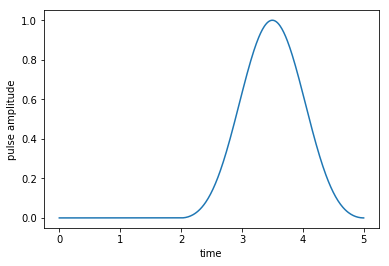

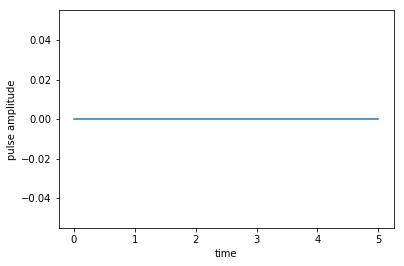

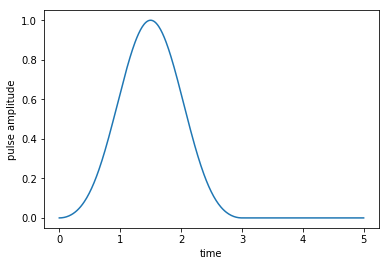

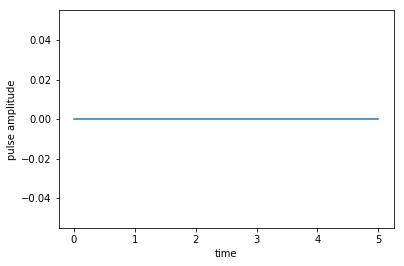

In [15]:
plot_pulse(H[1][1], tlist)
plot_pulse(H[2][1], tlist)
plot_pulse(H[3][1], tlist)
plot_pulse(H[4][1], tlist)

After assuring ourselves that our guess pulses appear as expected, we propagte the system using our guess. Since the pulses are temporally disjoint, we expect the first pulse to have no effect, whilst the second merely transfers population out of $\Ket{1}$ into $\Ket{2}$ and back again.

In [16]:
guess_dynamics = objectives[0].mesolve(tlist, e_ops=[proj1,proj2,proj3])

In [17]:
def plot_population(result):
    fig, ax = plt.subplots()
    ax.plot(result.times, result.expect[0], label='1')
    ax.plot(result.times, result.expect[1], label='2')
    ax.plot(result.times, result.expect[2], label='3')
    ax.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    plt.show(fig)

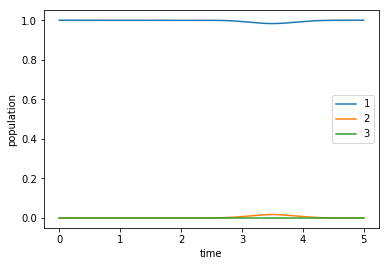

In [18]:
plot_population(guess_dynamics)

# Optimise
We now supply Krotov with all the information it needs to optimise, consisting of the `objectives` (maximise population in $\Ket{3}$ at $t_{1}$), `pulse_options` (the initial shapes of our pulses and how they may be changed) as well as the `propagator` to use, optimisation functional (`chi_constructor`), `info_hook` (processing occuring inbetween iterations of optimisation) and the number of iterations to perform, `iter_stop`.

In [19]:
oct_result = krotov.optimize_pulses(
    objectives, pulse_options, tlist,
    propagator=krotov.propagators.expm,
    chi_constructor=krotov.functionals.chis_re,
    info_hook=krotov.info_hooks.chain(
        krotov.info_hooks.print_debug_information,
        print_fidelity),
    iter_stop=20
)

Iteration 0
    objectives:
        1:|(3)⟩ - {[Herm[3,3], [Herm[3,3], u1(t)], [Herm[3,3], u2(t)], [Herm[3,3], u3(t)], [Herm[3,3], u4(t)]]} - |(3)⟩
    adjoint objectives:
        1:⟨(3)| - {[Herm[3,3], [Herm[3,3], u1(t)], [Herm[3,3], u2(t)], [Herm[3,3], u3(t)], [Herm[3,3], u4(t)]]} - ⟨(3)|
    λₐ: 2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00
    S(t) (ranges): [0.000000, 1.000155], [0.000000, 1.000155], [0.000000, 1.000155], [0.000000, 1.000155]
    duration: 1.3 secs (started at 2018-11-28 15:24:16)
    optimized pulses (ranges): [-0.00, 1.00], [0.00, 0.00], [-0.00, 1.00], [-0.00, -0.00]
    backward states: None
    forward states: [1 * ndarray(500)]
    fw_states_T norm: 1.000000
    τ: (7.33e-06:0.95π)
   F = -0.000007
Iteration 1
    duration: 3.0 secs (started at 2018-11-28 15:24:18)
    optimized pulses (ranges): [-0.02, 1.00], [-0.02, 0.02], [-0.03, 1.00], [-0.03, 0.03]
    backward states: [1 * ndarray(500)]
    forward states: [1 * ndarray(500)]
    fw_states_T norm: 1.000000
    

We appear to have found pulse-shapes that fulfill our objective, but what do they look like?

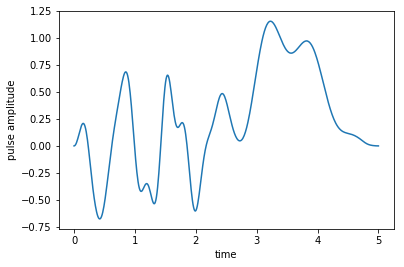

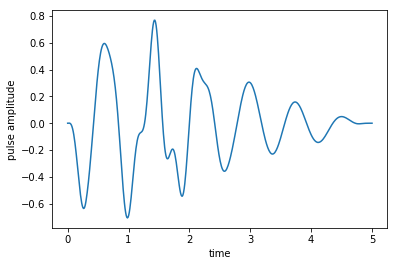

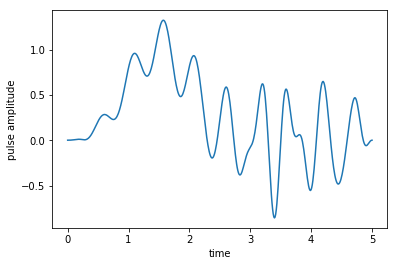

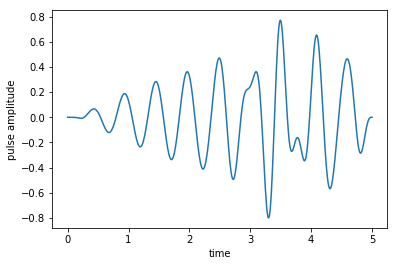

In [20]:
plot_pulse(oct_result.optimized_controls[0], tlist)
plot_pulse(oct_result.optimized_controls[1], tlist)
plot_pulse(oct_result.optimized_controls[2], tlist)
plot_pulse(oct_result.optimized_controls[3], tlist)

And how does the population end up in $\Ket{3}$?

In [21]:
opt_dynamics = oct_result.optimized_objectives[0].mesolve(tlist, e_ops=[proj1,proj2,proj3])

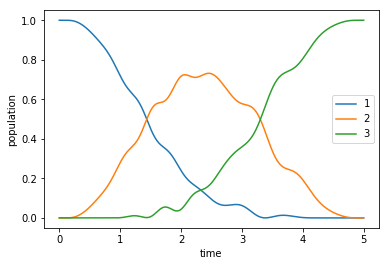

In [22]:
plot_population(opt_dynamics)